In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Crop and flip an image using Numpy array indexing

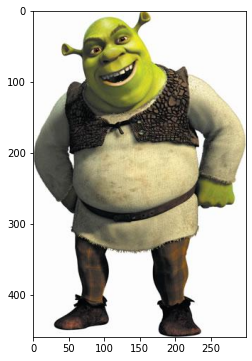

In [11]:
img = cv2.imread("shrek.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (8,6)
plt.imshow(img)

Text(0.5, 1.0, 'Cropped Image')

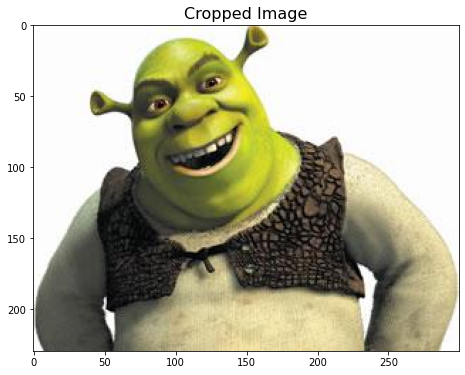

In [12]:
img_array = np.array(img)[:img.shape[0]//2] # crop in half
plt.imshow(img_array)
plt.title("Cropped Image", fontsize=16)

Text(0.5, 1.0, 'Cropped and Flipped Image')

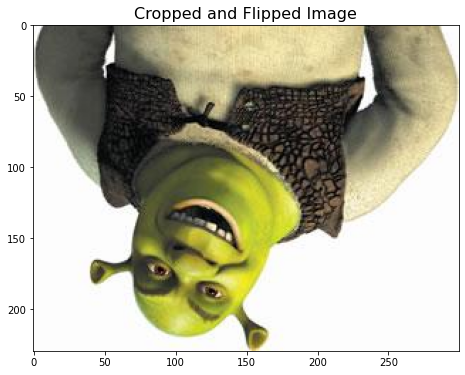

In [13]:
fliped_img = img_array[::-1]
plt.imshow(fliped_img)
plt.title("Cropped and Flipped Image", fontsize=16)

# Implement image translation using Numpy and OpenCV

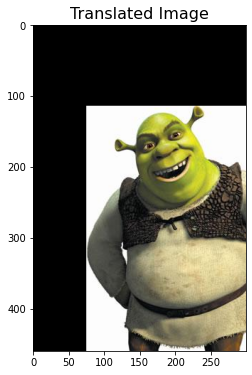

In [16]:
new_height = img.shape[0] // 4
new_width = img.shape[1] // 4

M = np.float32([[1, 0, new_width], [0, 1, new_height]])

img_translation = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.title("Translated Image", fontsize=16)
plt.imshow(img_translation)

# Implement image rotation using Numpy and OpenCV

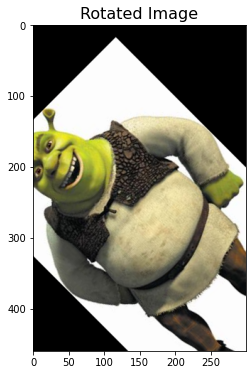

In [17]:
(h,w) = img.shape[:2]

cX = img.shape[0]//2
cY = img.shape[0]//2

degree = 45

M = cv2.getRotationMatrix2D((cX, cY), degree, 1.0)
rotated_img = cv2.warpAffine(img, M, (w, h))

plt.title("Rotated Image", fontsize=16)
plt.imshow(rotated_img)

# Implement image resizing using OpenCV

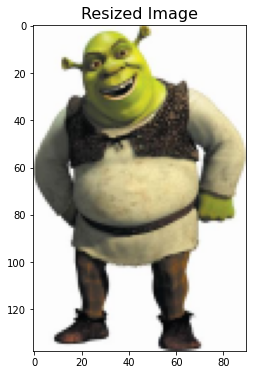

In [24]:
scale = 0.3

new_width = int(img.shape[1] * scale)
new_height = int(img.shape[0] * scale)

dim = (new_width, new_height)

resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.title("Resized Image", fontsize=16)
plt.imshow(resized_img)

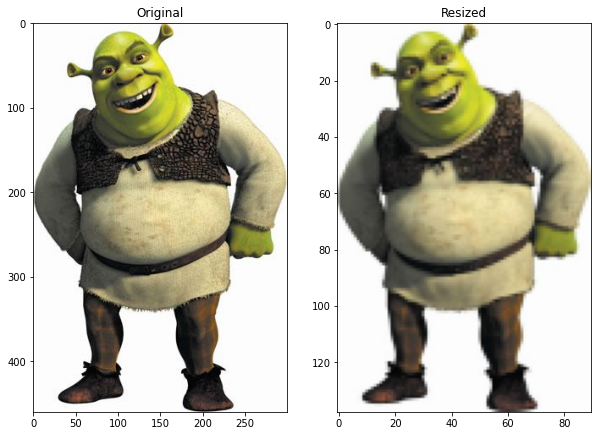

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(resized_img)
ax[1].set_title('Resized')

plt.show()

# Implement bitwise operations: AND, OR, XOR

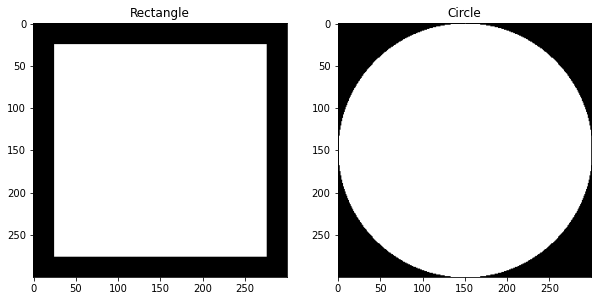

In [30]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
rectangle = cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB)

ax[0].imshow(rectangle)
ax[0].set_title('Rectangle')

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
circle = cv2.cvtColor(circle, cv2.COLOR_BGR2RGB)

ax[1].imshow(circle)
ax[1].set_title('Circle')

plt.show()

In [31]:
# Bitwise AND
AND = cv2.bitwise_and(rectangle, circle)

# Bitwise OR
OR = cv2.bitwise_or(rectangle, circle)

# Bitwise XOR
XOR = cv2.bitwise_xor(rectangle, circle)

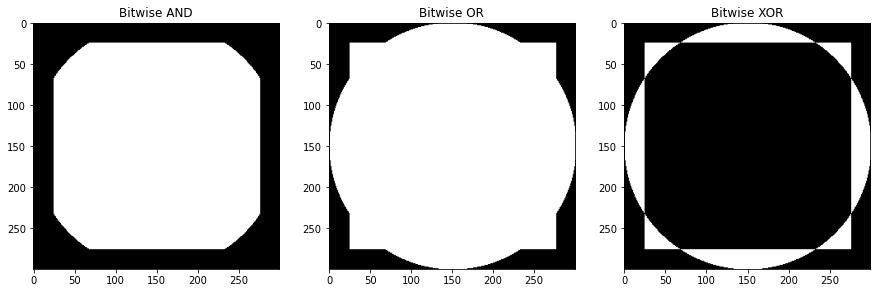

In [32]:
fig, ax = plt.subplots(1,3, figsize=(15,8))

ax[0].imshow(AND)
ax[0].set_title('Bitwise AND')

ax[1].imshow(OR)
ax[1].set_title('Bitwise OR')

ax[2].imshow(XOR)
ax[2].set_title('Bitwise XOR')

plt.show()

# Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'

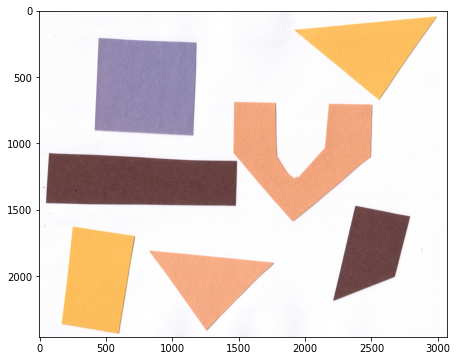

In [33]:
shapes_img = cv2.imread("shapes.jpg")
shapes_img = cv2.cvtColor(shapes_img, cv2.COLOR_BGR2RGB)
plt.imshow(shapes_img)

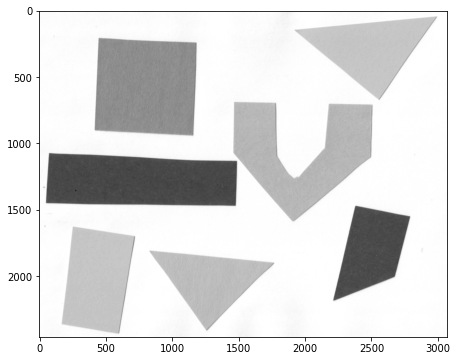

In [34]:
shpes_gray = cv2.cvtColor(shapes_img, cv2.COLOR_RGB2GRAY)

kernel = np.ones((5,5),np.float32)/25
blurred_image = cv2.filter2D(shpes_gray,-1,kernel)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

(0.0, 256.0)

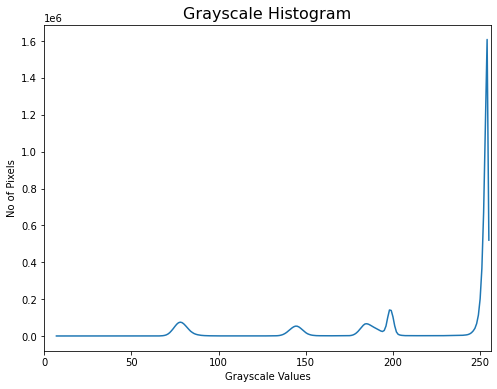

In [44]:
freq = np.unique(blurred_image, return_counts=True)

plt.plot(freq[0], freq[1])
plt.title("Grayscale Histogram", fontsize=16)
plt.xlabel("Grayscale Values")
plt.ylabel("No of Pixels")
plt.xlim(0, 256)

Text(0.5, 1.0, 'Mask based on the threshold')

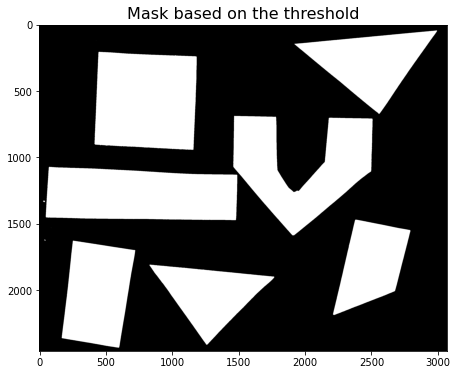

In [49]:
threshold = 225
mask = (blurred_image < threshold)

plt.imshow(mask, cmap='gray')
plt.title("Mask based on the threshold", fontsize=16)

Text(0.5, 1.0, 'Result of mask operation')

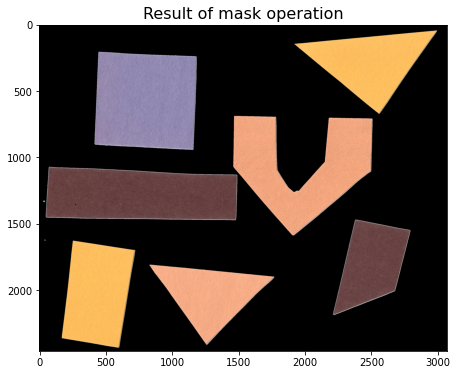

In [50]:
result_img = shapes_img.copy()
result_img[~mask] = 0

plt.imshow(result_img)
plt.title("Result of mask operation", fontsize=16)